# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

Elas estão disponíveis para download abaixo da aula (se você puxar os dados direto do Kaggle pode ser que encontre resultados diferentes dos meus, afinal as bases de dados podem ter sido atualizadas).

Caso queira uma outra solução, podemos olhar como referência a solução do usuário Allan Bruno do kaggle no Notebook: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb

Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

### Importar Bibliotecas e Bases de Dados

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Consolidar Base de Dados

In [2]:
meses = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path("/Users/thiarly/Downloads/bases_analise/dataset")

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    if arquivo.suffix == ".csv":
        nome_mes = arquivo.name[:3]
        mes = meses[nome_mes]

        ano = arquivo.name[-8:]
        ano = int(ano.replace(".csv", ""))

        df = pd.read_csv(caminho_bases / arquivo.name)
        df['ano'] = ano
        df['mes'] = mes
        base_airbnb = base_airbnb.append(df)

display(base_airbnb)

/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
/var/folders/zj/

/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:15: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/3950481134.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
/var/folders/zj/nb38z6

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,ano,mes
0,17878,https://www.airbnb.com/rooms/17878,20200121213543,2020-01-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.12,2020,1
1,21280,https://www.airbnb.com/rooms/21280,20200121213543,2020-01-22,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,1.23,2020,1
2,25026,https://www.airbnb.com/rooms/25026,20200121213543,2020-01-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3.0,0.0,0.0,2.02,2020,1
3,31560,https://www.airbnb.com/rooms/31560,20200121213543,2020-01-22,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.39,2020,1
4,35636,https://www.airbnb.com/rooms/35636,20200121213543,2020-01-22,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1.0,0.0,0.0,2.29,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36373,33014188,https://www.airbnb.com/rooms/33014188,20190313042552,2019-03-13,Ótimo apartamento à 3 ruas da praia,NaN,NaN,"O bairro é simplesmente maravilhoso, a 5min a ...",none,"O bairro é simplesmente maravilhoso, a 5min a ...",...,flexible,f,f,1,1.0,0.0,0.0,NaN,2019,3
36374,33014427,https://www.airbnb.com/rooms/33014427,20190313042552,2019-03-13,Maravilhoso Apto Com Vista Total Do Mar!!,"Apartamento recém reformado, novinho e pronto ...",NaN,"Apartamento recém reformado, novinho e pronto ...",none,NaN,...,flexible,f,f,1,1.0,0.0,0.0,NaN,2019,3
36375,33016673,https://www.airbnb.com/rooms/33016673,20190313042552,2019-03-13,Próximo metrô largo do Machado e catete,NaN,NaN,"Próximo ao metrô largo do Machado e catete, me...",none,"Próximo ao metrô largo do Machado e catete, me...",...,flexible,f,f,1,1.0,0.0,0.0,NaN,2019,3
36376,33021915,https://www.airbnb.com/rooms/33021915,20190313042552,2019-03-13,"Aconchegante apt no posto 2, 100m praia, vista...",NaN,NaN,NaN,none,NaN,...,flexible,f,f,23,23.0,0.0,0.0,NaN,2019,3


- Como temos muitas colunas, nosso modelo pode acabar ficando muito lento.
- Além disso, uma análise rápida permite ver que várias colunas não são necessárias para o nosso modelo de previsão, por isso, vamos excluir algumas colunas da nossa base

- Tipos de colunas que vamos excluir:
    1.IDs,  links e informações modelo
    2. Colunar repetidas e extremante repetidas data x ano/mês
    3. Colunas com texto livre, não analisaremos textos
    4. Colunas com valores iguais ou none
    5.
- Para isso, vamos criar um arquivo em excel com os 1.000 primeiros registros e fazer uma análise qualitativa

In [3]:
print(list(base_airbnb.columns))

base_airbnb.head(1000).to_csv("/Users/thiarly/Downloads/bases_analise/primeiros_registros01.csv", sep=";")

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

### Depoas da análise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos com as seguintes colunas.

In [4]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']
base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,within an hour,100%,t,2.0,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2020,1
1,within an hour,100%,f,0.0,-22.98467,-43.19611,Apartment,Entire home/apt,6,2.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2020,1
2,within a day,86%,f,3.0,-22.97712,-43.19045,Apartment,Entire home/apt,2,1.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2020,1
3,within an hour,100%,t,1.0,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2020,1
4,within an hour,100%,f,1.0,-22.98816,-43.19359,Apartment,Entire home/apt,2,1.5,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36373,NaN,NaN,f,1.0,-23.02612,-43.46498,Condominium,Entire home/apt,6,2.5,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36374,NaN,NaN,f,1.0,-23.01049,-43.36381,Apartment,Entire home/apt,6,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36375,NaN,NaN,f,1.0,-22.92795,-43.17568,Apartment,Entire home/apt,2,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36376,within a few hours,84%,f,34.0,-22.96248,-43.17447,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,3


In [5]:
#comando de tratamento para remoção de colunas
# print(base_airbnb["host_response_rate"].value_counts())
# print(base_airbnb["square_feet"].isnull().sum())
# print((base_airbnb["host_listings_count"]==base_airbnb["host_total_listings_count"]).value_counts())


### Tratar Valores Faltando

- Visualizando os dados, existem uma grande disparidade faltante, as colunas com mais de 1000 valores faltantes foram excluidas.

In [6]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 1000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)

print(base_airbnb.isnull().sum())




host_is_superhost           460
host_listings_count         460
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bedrooms                    850
bed_type                      0
amenities                     0
price                         0
guests_included               0
extra_people                  0
minimum_nights                0
maximum_nights                0
number_of_reviews             0
instant_bookable              0
is_business_travel_ready      0
cancellation_policy           0
ano                           0
mes                           0
dtype: int64


### Verificar Tipos de Dados em cada coluna

In [7]:
base_airbnb = base_airbnb.dropna() 
print(base_airbnb.isnull().sum())
print(base_airbnb.shape)

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bedrooms                    0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64
(900900, 21)


In [8]:
print(base_airbnb.dtypes)
print('-' * 60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bedrooms                    float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           t
host_listings_count                                                       2.0
latitude     

In [9]:
# Como price e extra_people está sendo reconhecido com objeto vamos mudar o tipo da variavel coluna.

In [10]:
# # price

base_airbnb["price"] = base_airbnb["price"].str.replace('$', '')
base_airbnb["price"] = base_airbnb["price"].str.replace(',', '')
base_airbnb["price"] = base_airbnb["price"].astype(np.float32, copy=False)


# # extra_people
base_airbnb["extra_people"] = base_airbnb["extra_people"].str.replace('$', '').str.replace(',', '')
base_airbnb["extra_people"] = base_airbnb["extra_people"].astype(np.float32, copy=False)


print(base_airbnb.iloc[0])
print(base_airbnb.dtypes)



/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/926143569.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb["price"] = base_airbnb["price"].str.replace('$', '')
/var/folders/zj/nb38z67n0g12xy5sbwbcfymr0000gn/T/ipykernel_7501/926143569.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb["extra_people"] = base_airbnb["extra_people"].str.replace('$', '').str.replace(',', '')


host_is_superhost                                                           t
host_listings_count                                                       2.0
latitude                                                            -22.96592
longitude                                                           -43.17896
property_type                                                     Condominium
room_type                                                     Entire home/apt
accommodates                                                                5
bedrooms                                                                  2.0
bed_type                                                             Real Bed
amenities                   {TV,"Cable TV",Internet,Wifi,"Air conditioning...
price                                                                   332.0
guests_included                                                             2
extra_people                                                    

### Análise Exploratória e Tratar Outliers

<AxesSubplot:>

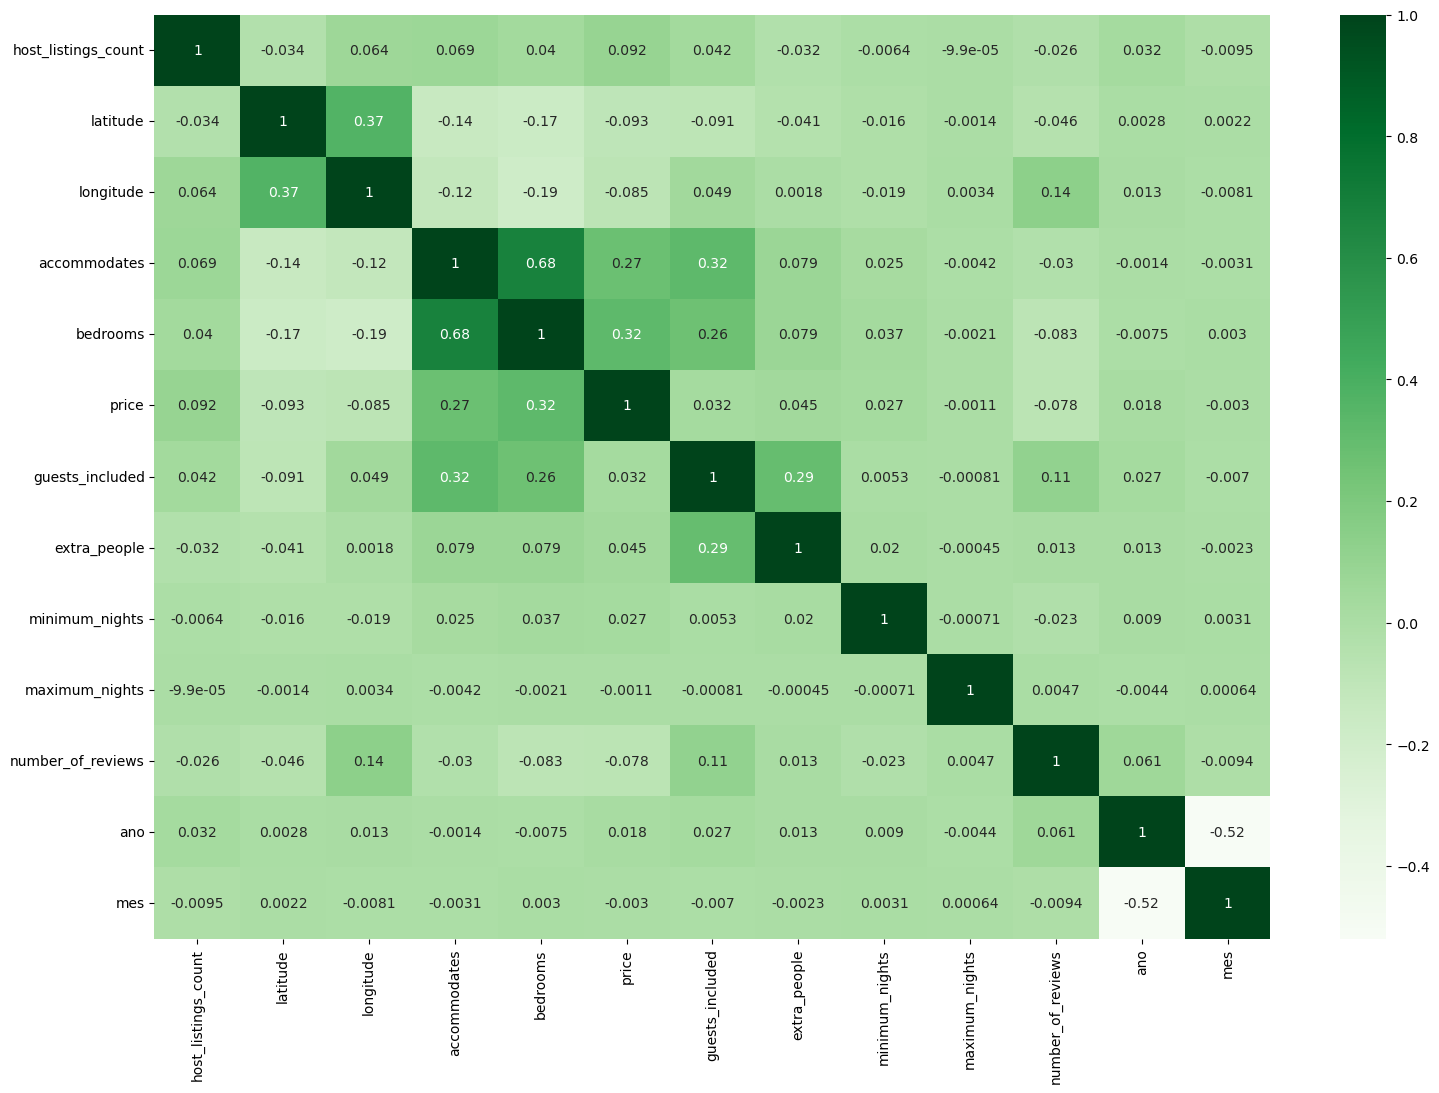

In [11]:
plt.figure(figsize=(18, 12))
sns.heatmap(base_airbnb.corr(), annot=True, cmap="Greens")


# print(base_airbnb.corr())

### Denifição de funçõe para análise de outliers
- Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [34]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas


print(limites(base_airbnb["price"]))

(-524.0, 1276.0)


In [69]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(coluna, kde=True)
    #sns.distplot(coluna, hist=True)

### Price

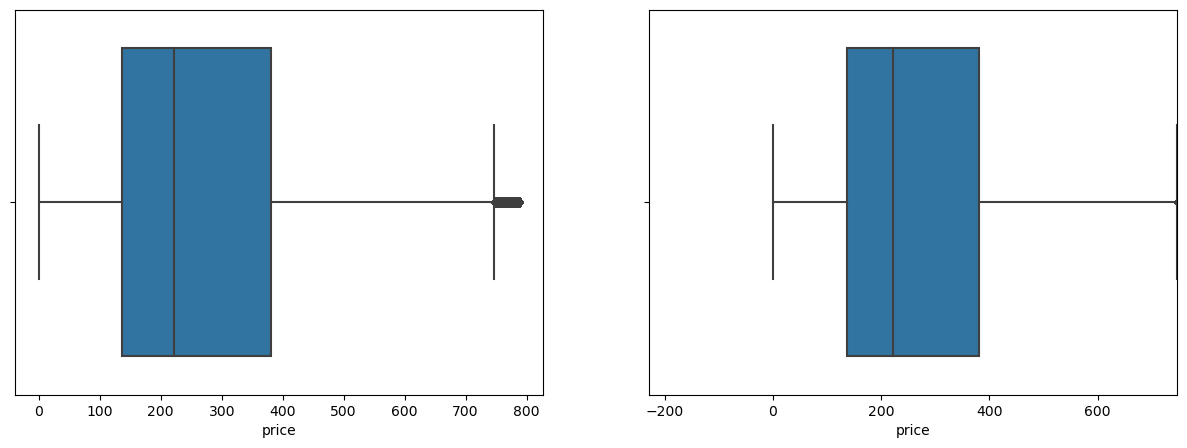

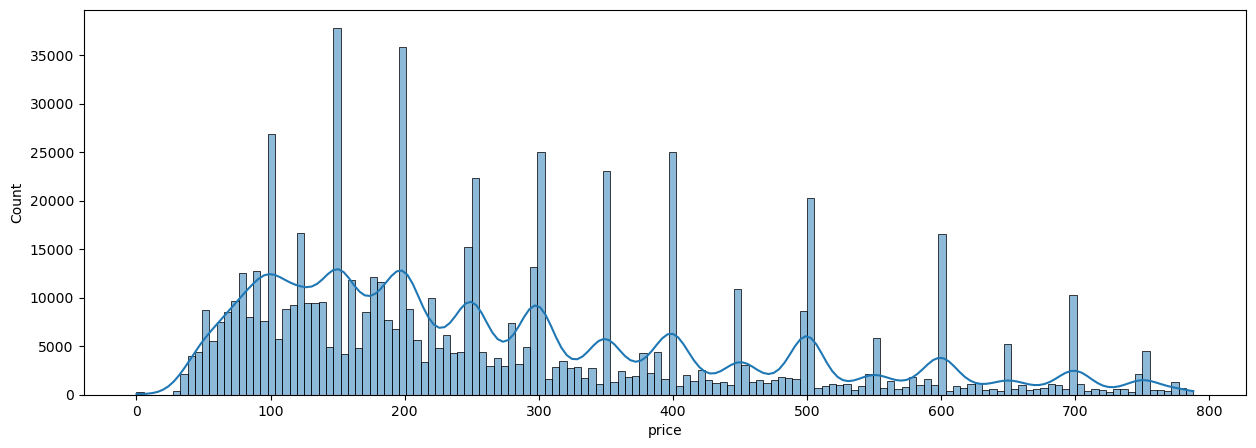

In [72]:
diagrama_caixa(base_airbnb["price"])
histograma(base_airbnb["price"])

In [65]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print('{} linhas removidas.'.format(linhas_removidas))

29865 linhas removidas.


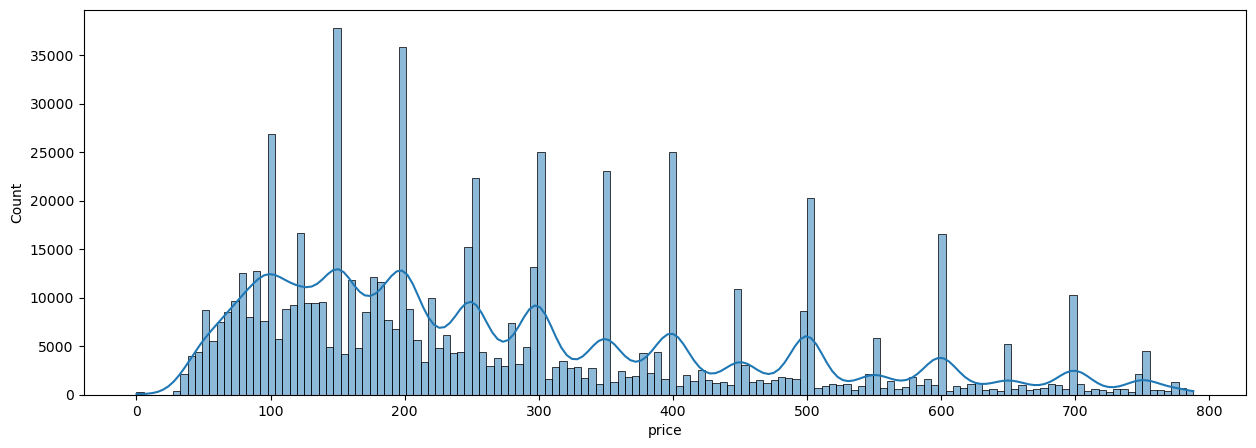

In [70]:
histograma(base_airbnb["price"])

### Extra People

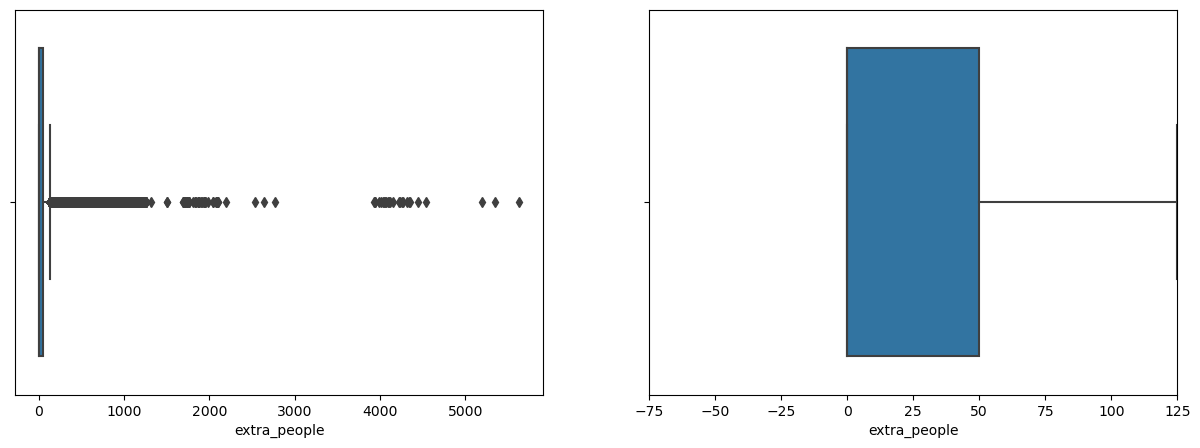

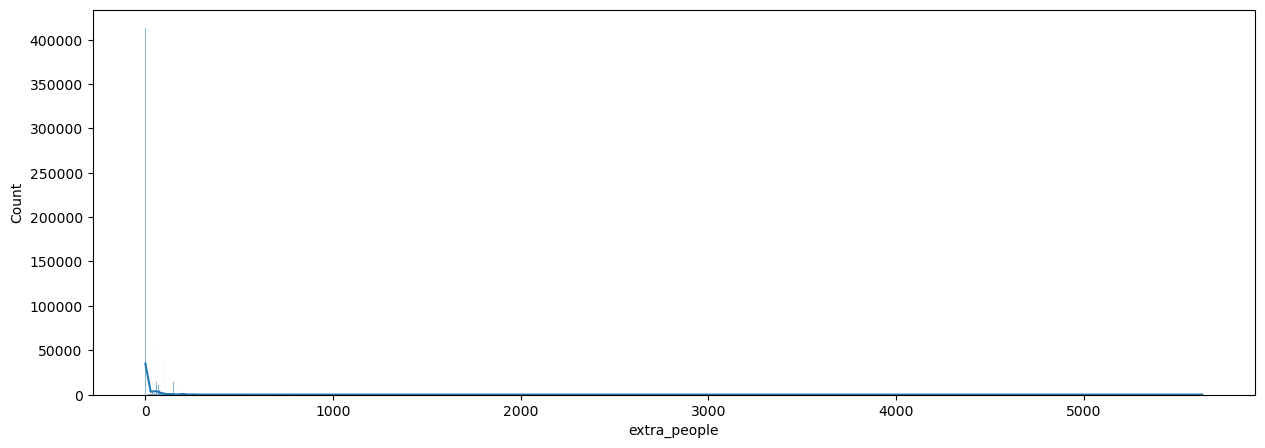

In [73]:
diagrama_caixa(base_airbnb["extra_people"])
histograma(base_airbnb["extra_people"])

In [74]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print('{} linhas removidas.'.format(linhas_removidas))

47617 linhas removidas.


Como estou contruindo um modelo para imóveis comuns dessa forma vou excluir os valos outlier.

### Encoding

### Modelo de Previsão

### Análise do Melhor Modelo

### Ajustes e Melhorias no Melhor Modelo